# Part II - Prosper Loan Data
## by Idris Lawal

## Factors that affect Loan's Outcome Status


## Investigation Overview
I explored the several variables that could be used to predict if a loan would be completed, defaulted or charged off. The main focus was on Debt-to-Income (DTI) ratio, Annual Percentage Rate (APR), Income Range, Prosper score and outstanding debt.


## Dataset Overview

The data contained loan status and several variables of approximately 114,000 listed loans on the peer-to-peer online credit marketplace, Prosper Funding LLC, between 2005 and 2014. The variables included APR, DTI ratio, Income Range, Outstanding payment, prosper score and other important variable. About half of the data points were removed due low outliers, unrealistic values and filtering on the required loan status for analysis (i.e Completed, Defaulted and Chargedoff loans)

In [80]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [81]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [82]:
# convert IncomeRange and ProsperScore into ordered categorical types

ordinal_var_dict = {'IncomeRange': ['Not displayed','Not employed','$0', '$1-24,999',
                    '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                    'ProsperScore': list(np.arange(1,12,1))}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)


In [83]:
# Data wrangling, replacing missing values in the "BorrowerAPR" column with 
# appropriate values based on a visual assumption
loan['BorrowerAPR'] = loan['BorrowerAPR'].fillna(loan['BorrowerRate'] * 1.03)

In [84]:
# removing low outliers in "StatedMonthlyIncome" column
loan = loan[loan['StatedMonthlyIncome'] >= 10]

In [85]:
# filtering the dataset on loan status by completed, defaulted and charged off loans
statuses = ['Completed', 'Chargedoff', 'Defaulted']
status_filter = loan['LoanStatus'].isin(statuses)
loan = loan[status_filter]

## Loan Status Exploration

Loan status variable contain three unique values; Completed, Defaulted and Charged Off. About 37k loans were completed, 11500 were charged off and 5000 were defaulted.

In [86]:
default_color = sb.color_palette()[0]
status_counts = loan['LoanStatus'].value_counts()
n_loan = loan['LoanStatus'].value_counts().sum()
status_order = status_counts.index

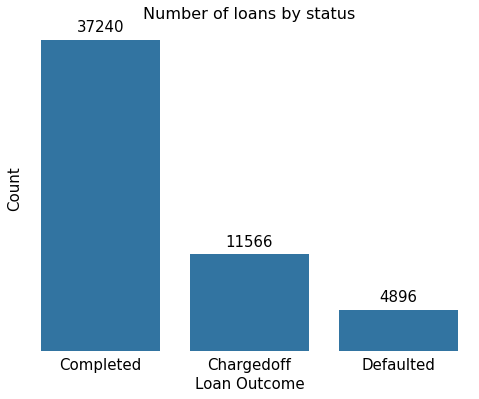

In [87]:
plt.figure(figsize=(8,6))
sb.countplot(data=loan, x='LoanStatus', color=default_color, order=status_order);

# Logic to print the proportion text on the bars
for i in range (status_counts.shape[0]):
    # Remember, status_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = status_counts[i]
    # Print the string value on the bar. 
    plt.text(i, count+1000, count, ha='center', fontsize=15)
    plt.xticks(fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xlabel('Loan Outcome', fontsize=15)
    plt.title('Number of loans by status', fontsize=16)
    plt.tick_params(labelleft=False, bottom=False, left=False)
    sb.despine(bottom=True, left=True)

## Distribution of Debt-to-Income (DTI) Ratio

DTI ratio is a measure of the amount of income a person generates in order to service a debt. In other words, it indicates how much of a person income goes toward debt payments. This variable shows a unimodal and right (positive) skewed distribution with most of the borrowers on low DTI ratio roughly between 0 and 0.35 which is good.

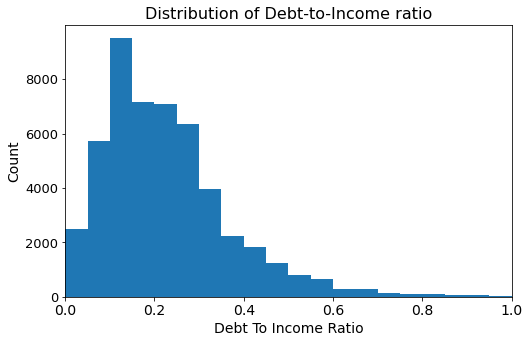

In [88]:
binsize = 0.05
bins = np.arange(0, loan['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.title("Distribution of Debt-to-Income ratio", fontsize=16)
plt.xlim(0,1)
plt.show()

## Loan's Annual Percentage Rate
Annual Percentage Rate also known as APR is the cost a person pays each year to borrow money, including fees, expressed as a percentage. It is a measure of the cost of borrowing money as it accounts for not only the interest rate but also other fees a borrower have to pay to get the loan. A large proportion of the loans' APRs are close to 0.25 and lower. However, there are two spikes roughly at 0.3 and 0.38 indicating quite a lot of debts are also being serviced at these rates.

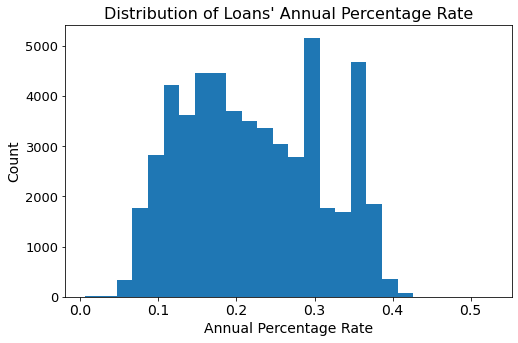

In [89]:
binsize = 0.02
bins = np.arange(loan['BorrowerAPR'].min(), loan['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins=bins)
plt.title("Distribution of Loans' Annual Percentage Rate", fontsize=16)
plt.xlabel('Annual Percentage Rate', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()

## Borrower's Outstanding Payment

This variable indicates the amount (principal) yet to paid off by the borrowers on prior loans.

Plotting on a log scale, it shows a long-tailed (left-skewed), unimodal distribution. 
It can be inferred that half of the borrowers with outstanding payment owed above $1000 and from the statistical analysis, about 25% of borrowers with loan records do not have outstanding payment.

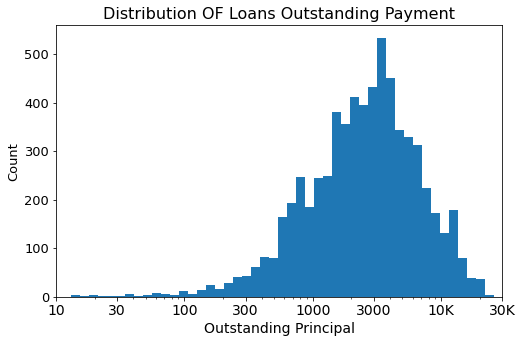

In [90]:
log_binsize = 0.07
bins = 10 ** np.arange(loan['ProsperPrincipalOutstanding'].min(), np.log10(loan['ProsperPrincipalOutstanding'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'ProsperPrincipalOutstanding', bins=bins)
plt.xlabel('Outstanding Principal', fontsize=14)
plt.ylabel('Count', fontsize=13)
plt.title("Distribution OF Loans Outstanding Payment", fontsize=16)
plt.xscale('log')
plt.xticks([1, 1e1, 3e1, 1e2, 3e2, 1e3, 3e3, 1e4, 3e4], [1, 10, 30, 100, 300, 1000, 3000, '10K', '30K'], fontsize=14)
plt.yticks(fontsize=13)
plt.xlim(1e1, 3e4)
plt.show()

## Income Range
This shows the annual income range of borrowers.
The plot depicts that most of the borrowers earned about $25k to $75k annually while some
earned above $75k. Quite a few did not disclosed their earnings and others are unemployed.

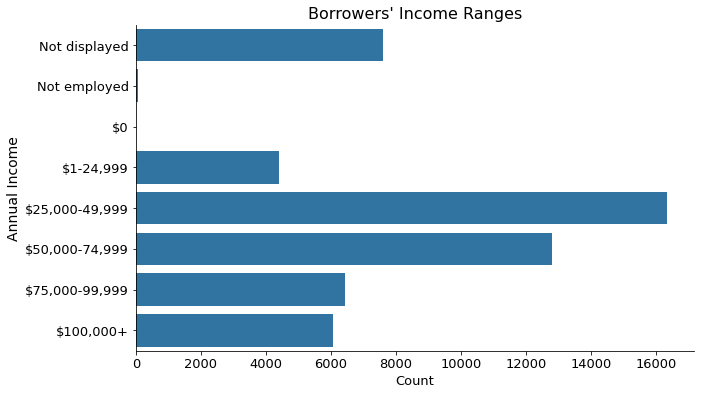

In [104]:
plt.figure(figsize=(10,6))
sb.countplot(data=loan, y='IncomeRange', color=default_color)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Annual Income', fontsize=14)
plt.xlabel('Count',fontsize=13)
plt.title("Borrowers' Income Ranges", fontsize=16);

## Prosper Score
This is a measure of the risk associated with each listed loan based on the some undisclosed metrics. The higher the number, the lesser the risk.
Majority of the loans in the dataset have a risk's score of over 5 points which indicates that the risk associated with such loans are fairly low. As an investor, it is important to look out for this number. A quick plot below shows that the higher the prosper score, the higher the number of investors with exceptions to points beyond 8 which is probably influence by other factors.

N.B Investors in the analysis refers to the lenders that contribute to a loan request.

In [92]:
df = loan.groupby('ProsperScore')['Investors'].sum().to_frame().reset_index()

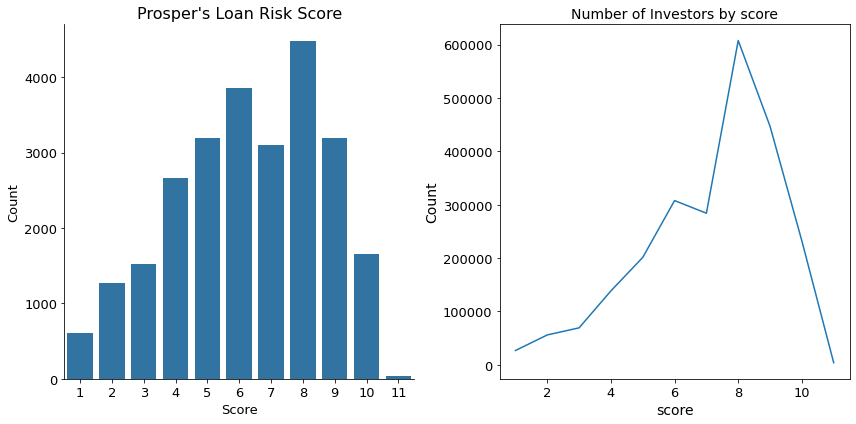

In [107]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sb.countplot(data=loan, x='ProsperScore', color=default_color)
sb.despine()
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Score', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.title("Prosper's Loan Risk Score", fontsize=16)

plt.subplot(1,2,2)
sb.lineplot(data = df, x='ProsperScore', y = 'Investors')
plt.xlabel("score", fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title("Number of Investors by score", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.tight_layout()
plt.show()


### Loan Status vs. Debt-to-Income (DTI) Ratio 

I will visulize this relationship with a boxenplot (to minimize false estimate of the outliers, overplotting and capture the distribution of the numerical variable more accurately) and pointplot (to measure the central tendency, in this case: MEAN).

Looking at the point plot below, we can see that on average, the higher the DTI ratio, the more likely a borrower would default on a loan. As previouly stated, high DTI ratio indicates that the person spends much of the income on debts while a low DTI indicates that a person spends less of the income on debts. We can safely conclude that borrowers with low DTI ratio tend to complete their loans more than those with high DTI ratio.

In [122]:
def bivariateplot(dataframe, x, y, color, linestyle, dodge):
    """ The function plots the distribution of the numerical variable using a boxenplot and shows its central tendency (mean) using a pointplot across the three loan status outcomes"""
    plt.figure(figsize=(14,6))

    plt.subplot(1,2,1) # boxenplot
    sb.boxenplot(data = dataframe, x = x, y = y)
    plt.title(f'{y} by Loan Status', fontsize=16)
    plt.xlabel('Status', fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.subplot(1,2,2) # pointplot
    sb.pointplot(data = dataframe, x = x, y = y, palette = color, linestyles = linestyle, dodge = dodge)
    plt.title(f'{y} by Loan Status', fontsize=16)
    plt.xlabel('Status', fontsize=15)
    plt.ylabel(y, fontsize=15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    
    plt.tight_layout()
    plt.show()

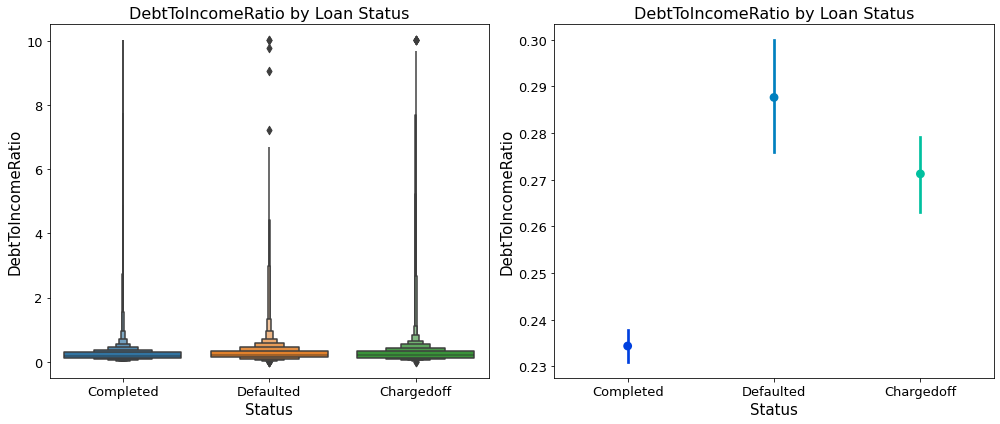

In [123]:
bivariateplot(loan, 'LoanStatus', 'DebtToIncomeRatio', 'winter', '', 0.1)

### Loan Status vs. Annual Percentage Rate (APR)
The plots below depict that completed loans have an average APR of 0.2 and 50% of the APR values are below 0.19, defaulted loans have an average APR of 0.23 and 50% of the APR values are below 0.24 while charged off loans had an average APR of 0.25 and 50% of the APR values are below 0.26. This indicates that loans on low APR have a higher chance of being completed.

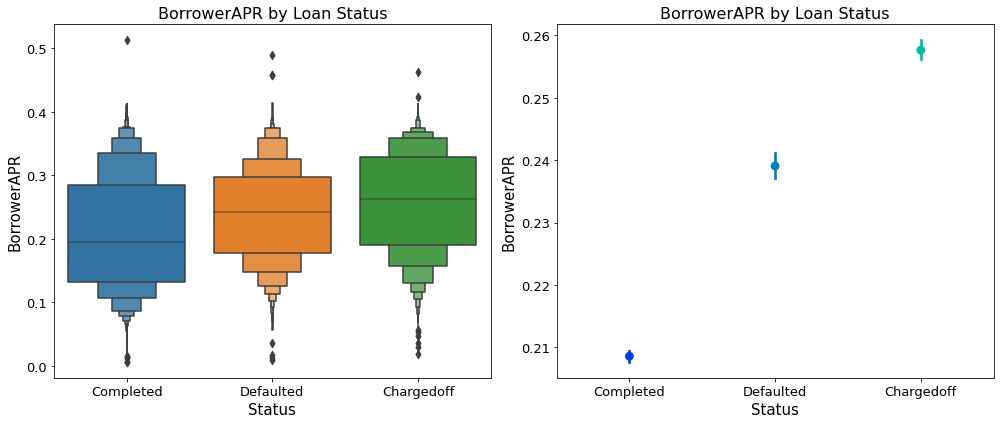

In [124]:
bivariateplot(loan, 'LoanStatus', 'BorrowerAPR', 'winter', '', 0.1)


### Loan Status vs. Outstanding Loan Payment

This depict a similar pattern as APR. 
* In completed loans, on average the borrowers had an outstanding debt of about 2100 dollars and half of the outstanding debt are less than approximately 820 dollars.
* In the defaulted loans, on average the borrowers had an outstanding debt of about 2930 dollars and half of the outstanding debt are less than approximately 1700 dollars.
* In the Chargedoff loans, on average the borrowers had an outstanding debt of about 3070 dollars and half of the outstanding debt are less than approximately 2070 dollars.

This indicates that the lower the outstanding debt, the lesser the risk of the loan being defaulted or chargedoff.

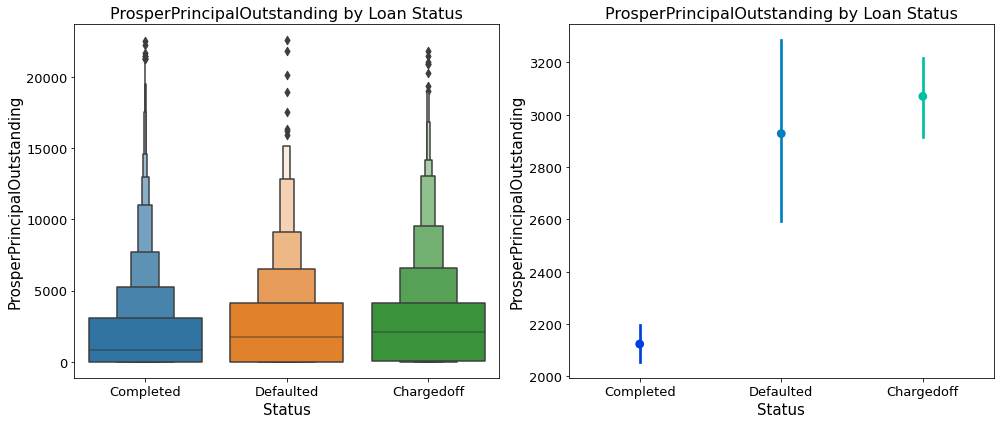

In [125]:
bivariateplot(loan, 'LoanStatus', 'ProsperPrincipalOutstanding', 'winter', '', 0.1)

### Loan Status vs. Income Range

Borrowers on high income range tend to complete more of their loans compared to those on low income range. Also the risk of a loan being defaulted or charged off are low if the borrowers is on the high income range and this can be inferred from the plot as well; the frequency of defaulted/charged off loans decreases with increase in income range.

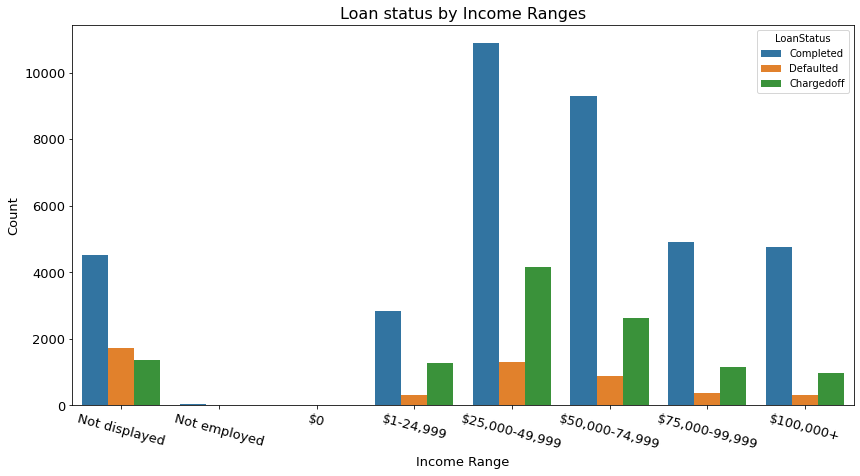

In [137]:
plt.figure(figsize = [14, 7])
sb.countplot(data = loan, x = 'IncomeRange', hue = 'LoanStatus')
plt.title("Loan status by Income Ranges", fontsize = 16)
plt.xlabel("Income Range", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13, rotation = -15)
plt.yticks(fontsize=13)
plt.show()

### Loan Status vs. Prosper Score

We can see that the majority of the completed loans scored 5 points and above with 8 points having the highest number of completed loans. It can also be inferred that the ratio of completed to defaulted/charged off loans fairly increases as the score increases indicating that more loans are completed on higher score.

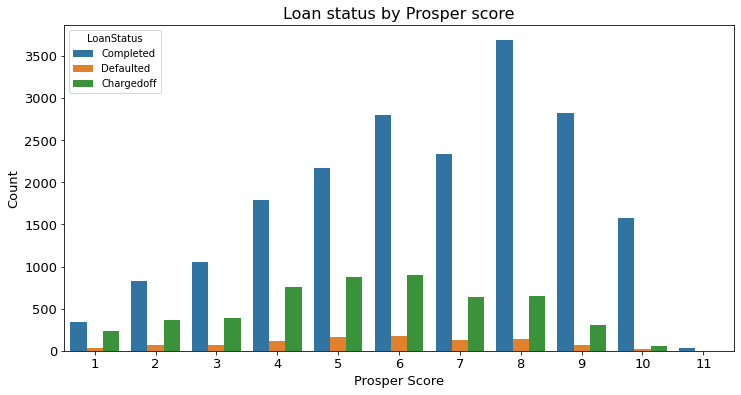

In [127]:
plt.figure(figsize = [12, 6])
sb.countplot(data = loan, x = 'ProsperScore', hue = 'LoanStatus')
plt.title("Loan status by Prosper score", fontsize = 16)
plt.xlabel("Prosper Score", fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

### Loan status by Income Range and Outstanding Payment

The higher the amount a borrower owes on prior loans, the higher the potential that the new loan would be defaulted or charged off even if the borrower is on high income range.

In [128]:
loan.IncomeRange.value_counts()

$25,000-49,999    16341
$50,000-74,999    12788
Not displayed      7604
$75,000-99,999     6442
$100,000+          6062
$1-24,999          4407
Not employed         58
$0                    0
Name: IncomeRange, dtype: int64

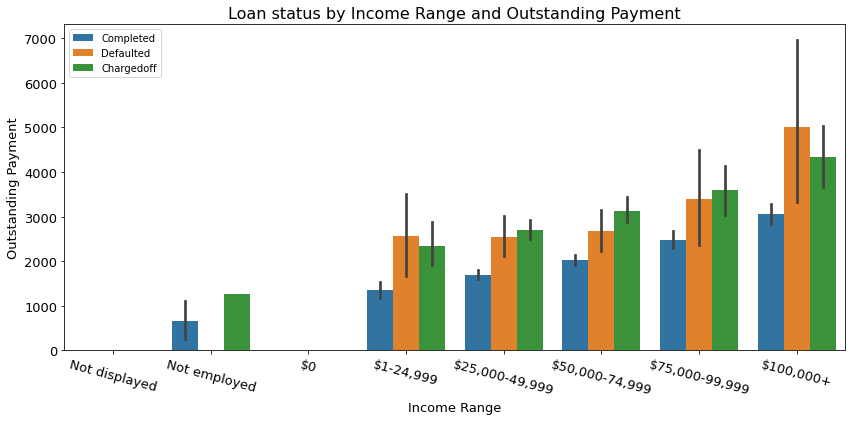

In [138]:
plt.figure(figsize=(14,6))
sb.barplot(data=loan, x="IncomeRange", y='ProsperPrincipalOutstanding',hue="LoanStatus")
plt.title('Loan status by Income Range and Outstanding Payment', fontsize = 16)
plt.xlabel("Income Range", fontsize=13)
plt.ylabel('Outstanding Payment', fontsize=13)
plt.xticks(fontsize=13, rotation = -15)
plt.yticks(fontsize=13)
plt.legend(loc = 2)
plt.show()